In [1]:
%matplotlib inline
import pandas as pd
import xarray as xr
import seaborn as sns
from string import ascii_uppercase
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set_context('paper')
sns.set_style('whitegrid')

In [2]:
data = {}

data['sss_control_full'] = xr.open_dataset('../data/R1010RBRbaaa01a.cice.h.sss_sst.nc')
data['sss_control_central'] = xr.open_dataset('../data/R1010RBRbaaa01a.cice.h.sss_sst_central.nc')
data['sss_norof_full'] = xr.open_dataset('../data/R1010RBbaaa01a.cice.h.sss_sst.nc')
data['sss_norof_central'] = xr.open_dataset('../data/R1010RBbaaa01a.cice.h.sss_sst_central.nc')
data['rof_control_all'] = xr.open_dataset('../data/R1010RBRbaaa01a.rvic.h.rof_by_mask.nc')


In [3]:
for k, ds in data.items():
    data[k] = ds.resample('MS', dim='time', how='mean').sel(time=slice('1980-01-01', None))

In [4]:
def plot_ocean_ts(series, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    series.plot(ax=ax, ls='-', **kwargs)
    kwargs.update(dict(label='', linestyle='--', dashes=(2, 2)))
    if 'zorder' in kwargs:
        kwargs['zorder'] += 1
    else:
        kwargs = 10
    series.rolling(24, min_periods=12, center=False).mean().plot(ax=ax, **kwargs)
    
    return ax

def plot_streamflow_ts(dframe, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    dframe.plot.area(ax=ax, **kwargs)

        
    

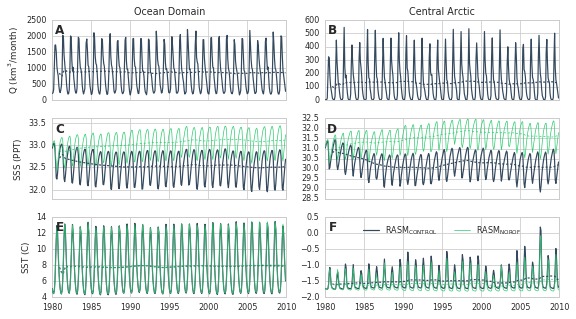

In [5]:
control_color = '#34495e'
norof_color = '#2ecc71'
control_lw = 1.2
norof_lw = 0.7
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(8, 4.5))

ax = ax=axes[0, 0]
plot_ocean_ts(data['rof_control_all']['mask_rvic_drainage'].to_series(), ax=ax, color=control_color, lw=control_lw, zorder=10)
ax.set_ylabel('Q $(km^3/month)$')
ax.set_title('Ocean Domain')

ax = ax=axes[0, 1]
plot_ocean_ts(data['rof_control_all']['mask_rof_to_centralarctic'].to_series(), ax=ax, color=control_color, lw=control_lw, zorder=10)
ax.set_title('Central Arctic')

ax = ax=axes[1, 0]
plot_ocean_ts(data['sss_control_full']['sss'].to_series(), ax=ax, color=control_color, lw=control_lw, zorder=10)
plot_ocean_ts(data['sss_norof_full']['sss'].to_series(), ax=ax, color=norof_color, lw=norof_lw, zorder=10)
ax.set_ylabel('SSS $(PPT)$')

ax = ax=axes[1, 1]
plot_ocean_ts(data['sss_control_central']['sss'].to_series(), ax=ax, color=control_color, lw=control_lw, zorder=10)
plot_ocean_ts(data['sss_norof_central']['sss'].to_series(), ax=ax, color=norof_color, lw=norof_lw, zorder=10)

ax = axes[2, 0]
plot_ocean_ts(data['sss_control_full']['sst'].to_series(), ax=ax, color=control_color, lw=control_lw, zorder=10)
plot_ocean_ts(data['sss_norof_full']['sst'].to_series(), ax=ax, color=norof_color, lw=norof_lw, zorder=10)
ax.set_ylabel('SST $(C)$')

ax = axes[2, 1]
plot_ocean_ts(data['sss_control_central']['sst'].to_series(), ax=ax, lw=control_lw, color=control_color,
              label='$RASM_{CONTROL}$', zorder=10)
plot_ocean_ts(data['sss_norof_central']['sst'].to_series(), ax=ax, lw=norof_lw, color=norof_color,
              label='$RASM_{NOROF}$', zorder=10)
ax.legend(ncol=2, loc=9)

[ax.set_xlabel('') for ax in axes[-1]]
fig.tight_layout()

dates = pd.date_range('1980', '2010', freq=pd.DateOffset(years=5))
for i, ax in enumerate(axes.flat):
    ax.text(0.05, 0.95,
            ascii_uppercase[i],
            transform=ax.transAxes,
            fontsize=12, fontweight='semibold', va='top', ha='right', zorder=100)
    
    ax.xaxis.set_ticks(dates)
    ax.xaxis.set_ticklabels(dates.strftime('%Y'))

fig.savefig('../figs/ocean_combine_ts.png', dpi=300)